### scipy.stats.norm

##### A normal continuous random variable.<br>The location(loc) keyword specifies the mean. The scale(scale) keyword specifies the standard deviation.<br>As an instance of the rv_continuous class, norm object inherits from it a collection of generic methods, and completes them with details specific for this particular distribution. The pdf for norm is : 

##### $$f(x) = \frac{exp(\frac{-x^2}{2})}{\sqrt{2\pi}}$$

##### The pdf above is defined in the "standardized" form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, norm.pdf(x, loc, scale) is identically equivalent to norm.pdf(y)/scale with y = (x-loc)/scale. Note that shifting the location of a distribution does not make it a "noncentral" distribution; noncentral generalizations of some distributions ara available in separate classes.

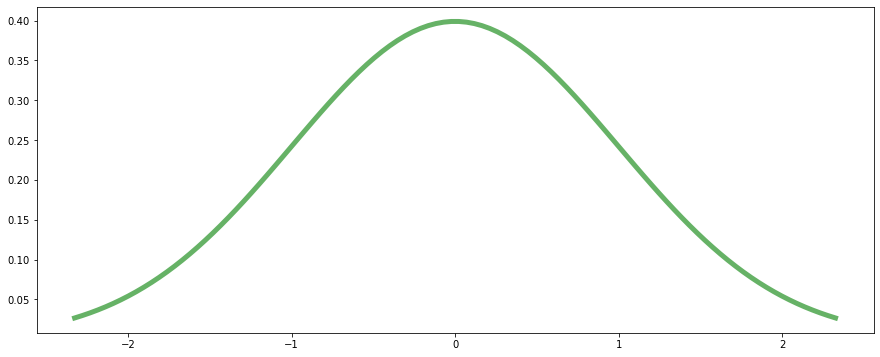

In [7]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

# Calculate the first four moments
mean, var, skew, kurt = norm.stats(moments='mvsk')

# Display the pdf
x = np.linspace(start=norm.ppf(0.01), stop=norm.ppf(0.99), num=100)
ax.plot(x, norm.pdf(x), 'g-', lw=5, alpha=0.6, label='norm pdf')
plt.show()